<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_21_Pie_Charts_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [4]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-12-09 08:36:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  10.4MB/s    in 16s     

2025-12-09 08:36:57 (9.55 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#**STEP 0: CLEANING AND PREPPING DATA**

In [13]:
# Columns I know or suspect might be multi-select
cols_to_check = [
    "DatabaseWantToWorkWith",
    "DevType",
    "OpSysProfessional use",
    "LanguageHaveWorkedWith",
    "NEWCollabToolsHaveWorkedWith",
    "LanguageAdmired",
    "AIToolCurrently Using",
    "WebframeWantToWorkWith",
    "EmbeddedWantToWorkWith"
]

# 1) Check which columns are actually multi-select (contain ';')
multi_select_check = {}
for col in cols_to_check:
    if col in df.columns:
        multi_select_check[col] = df[col].astype(str).str.contains(";", na=False).any()
    else:
        multi_select_check[col] = "COLUMN NOT FOUND"

multi_select_check


{'DatabaseWantToWorkWith': np.True_,
 'DevType': np.False_,
 'OpSysProfessional use': np.True_,
 'LanguageHaveWorkedWith': np.True_,
 'NEWCollabToolsHaveWorkedWith': np.True_,
 'LanguageAdmired': np.True_,
 'AIToolCurrently Using': np.True_,
 'WebframeWantToWorkWith': np.True_,
 'EmbeddedWantToWorkWith': np.True_}

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Make plots more readable
plt.rcParams.update({
    'figure.figsize': (7, 7),
    'font.size': 12
})


In [10]:
# Find the actual column names for OS + AI tool usage
[c for c in df.columns if "OpSys" in c]
[c for c in df.columns if "AI" in c and "Tool" in c]

['AIToolCurrently Using',
 'AIToolInterested in Using',
 'AIToolNot interested in Using']

In [11]:
[c for c in df.columns if "Op" in c or "Sys" in c or "OS" in c]


['OpSysPersonal use', 'OpSysProfessional use', 'NEWSOSites']

In [17]:
opsys_col_name = "OpSysProfessional use"

# Determine if it's multi-select or single-select
if df[opsys_col_name].astype(str).str.contains(";", na=False).any():
    opsys_top = get_top_n_from_multiselect(df[opsys_col_name], n=5)
else:
    opsys_top = get_top_n_from_single(df[opsys_col_name], n=5)


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



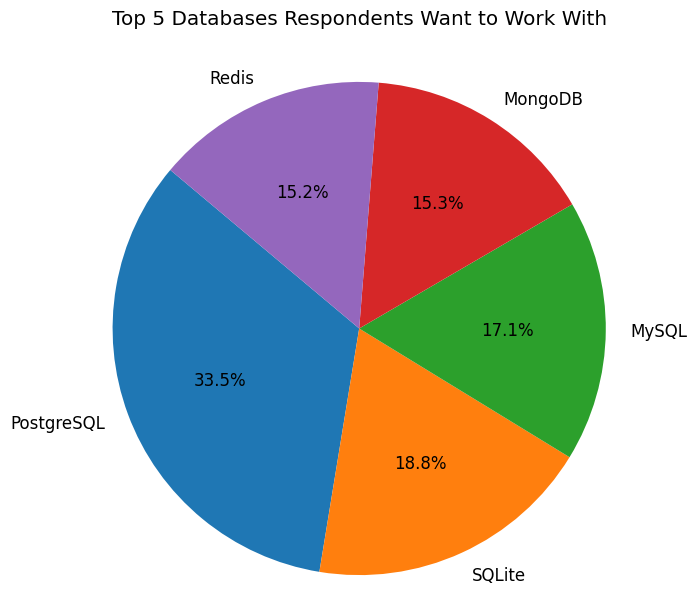

In [18]:
##Write your code here
# Task 1.1 – Top 5 Databases Respondents Want to Work With

# Get the top 5 databases (multi-select)
db_top5 = get_top_n_from_multiselect(df["DatabaseWantToWorkWith"], n=5)

# Plot
plt.figure(figsize=(7,7))
plt.pie(
    db_top5.values,
    labels=db_top5.index,
    autopct='%1.1f%%',
    startangle=140
)

# Title with padding to create space
plt.title("Top 5 Databases Respondents Want to Work With", pad=25)

plt.axis("equal")  # keep pie circular
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



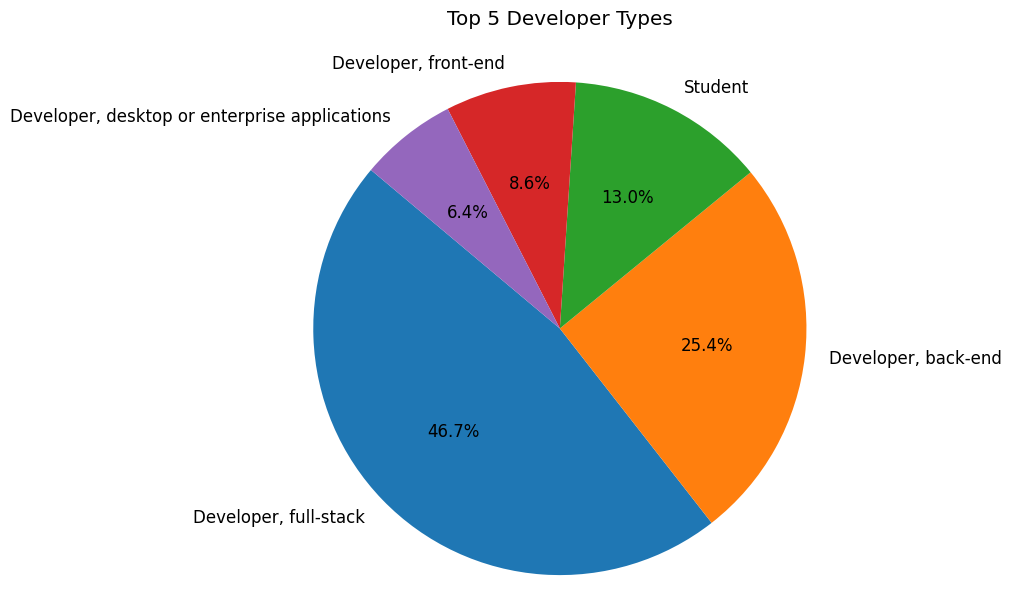

In [19]:
##Write your code here
# Task 1.2 – Top 5 Developer Types

devtype_top5 = get_top_n_from_single(df["DevType"], n=5)

plt.figure(figsize=(7,7))
plt.pie(
    devtype_top5.values,
    labels=devtype_top5.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Top 5 Developer Types", pad=25)
plt.axis("equal")
plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



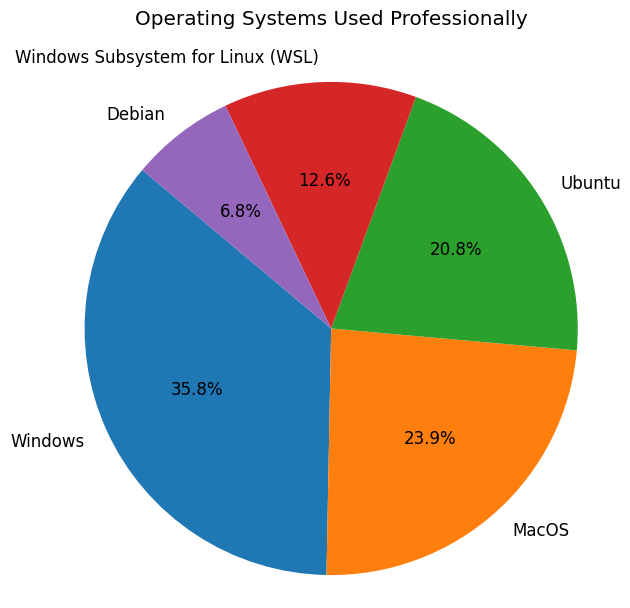

In [20]:
##Write your code here
# Task 1.3 – Operating Systems Used Professionally

opsys_col_name = "OpSysProfessional use"

# Auto-detect if it's multi-select
if df[opsys_col_name].astype(str).str.contains(";", na=False).any():
    opsys_top5 = get_top_n_from_multiselect(df[opsys_col_name], n=5)
else:
    opsys_top5 = get_top_n_from_single(df[opsys_col_name], n=5)

# Plot
plt.figure(figsize=(7,7))
plt.pie(
    opsys_top5.values,
    labels=opsys_top5.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Operating Systems Used Professionally", pad=25)
plt.axis("equal")
plt.show()


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



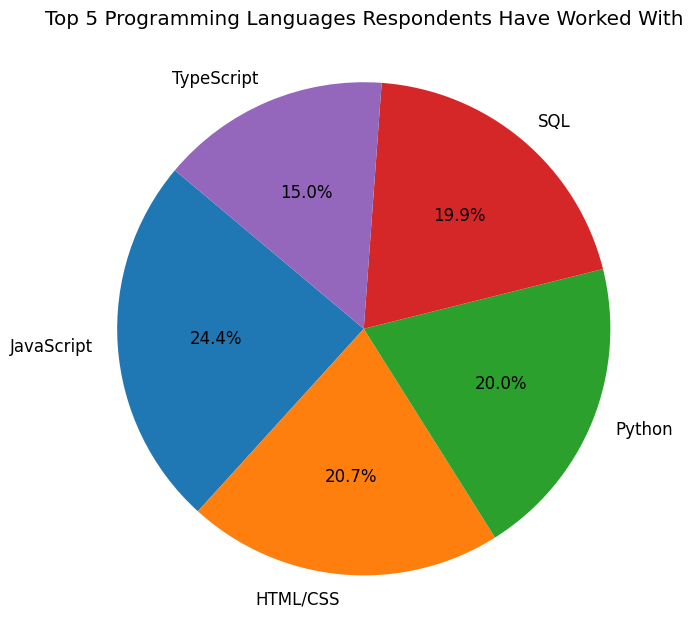

In [21]:
##Write your code here
# Task 2.1 – Top 5 Programming Languages Respondents Have Worked With

lang_top5 = get_top_n_from_multiselect(df["LanguageHaveWorkedWith"], n=5)

plt.figure(figsize=(7,7))
plt.pie(
    lang_top5.values,
    labels=lang_top5.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Top 5 Programming Languages Respondents Have Worked With", pad=25)
plt.axis("equal")
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



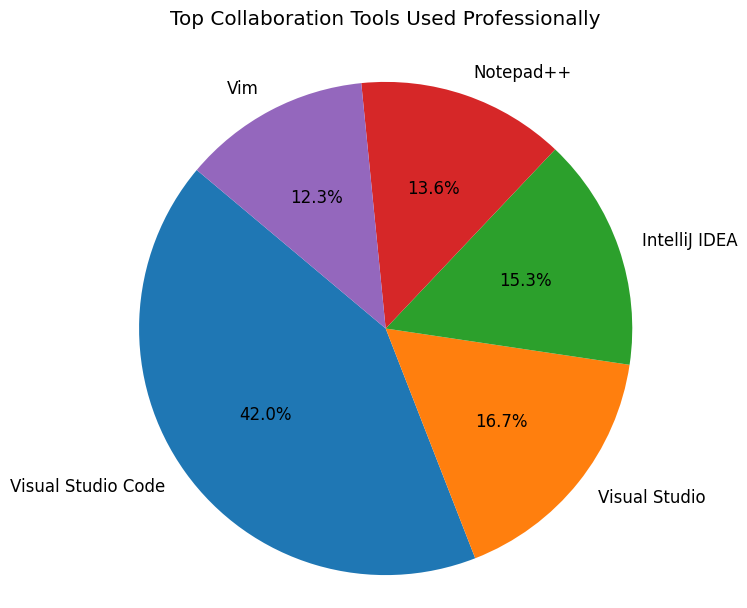

In [22]:
##Write your code here
# Task 2.2 – Top Collaboration Tools Used Professionally

collab_top5 = get_top_n_from_multiselect(df["NEWCollabToolsHaveWorkedWith"], n=5)

plt.figure(figsize=(7,7))
plt.pie(
    collab_top5.values,
    labels=collab_top5.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Top Collaboration Tools Used Professionally", pad=25)
plt.axis("equal")
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



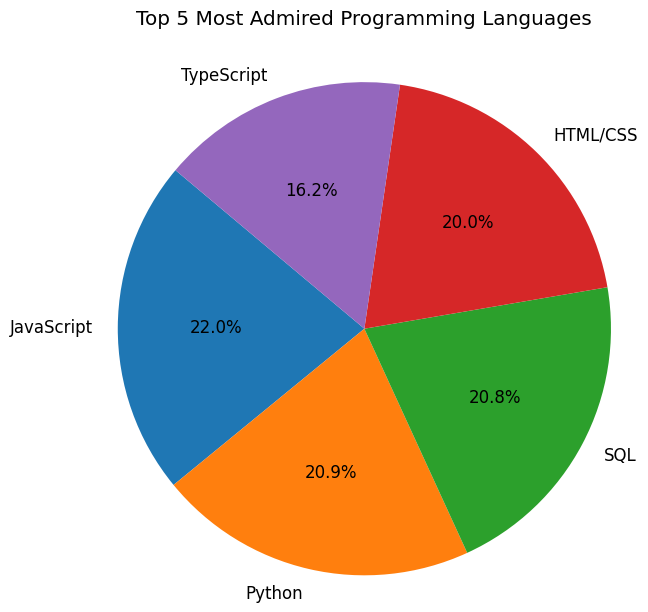

In [24]:
##Write your code here
# Task 3.1 – Most Admired Programming Languages

admired_top5 = get_top_n_from_multiselect(df["LanguageAdmired"], n=5)

plt.figure(figsize=(7,7))
plt.pie(
    admired_top5.values,
    labels=admired_top5.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Top 5 Most Admired Programming Languages", pad=25)
plt.axis("equal")
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



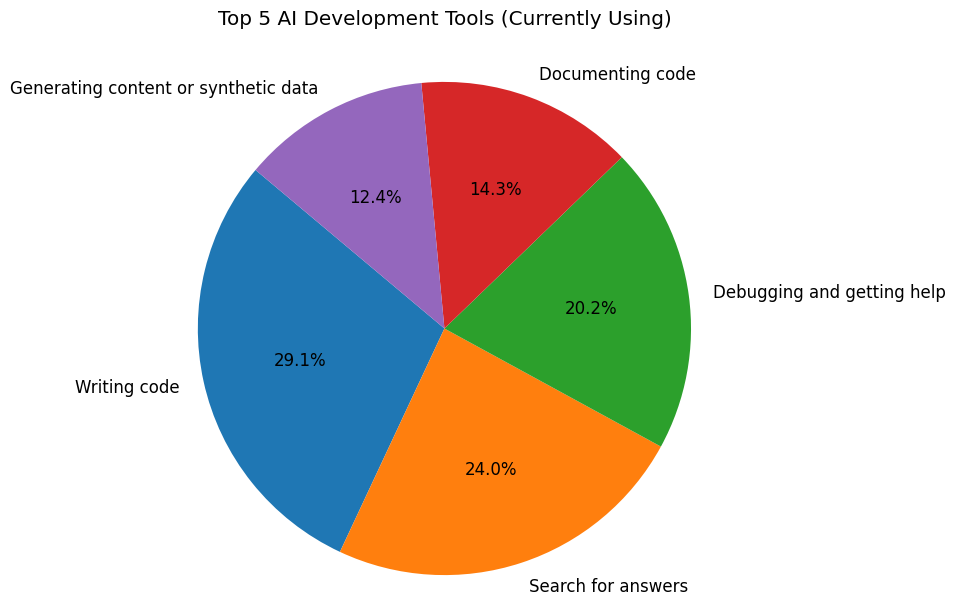

In [25]:
##Write your code here
# Task 3.2 – Tools Used for AI Development

ai_tool_col_name = "AIToolCurrently Using"

# Auto-detect multi-select
if df[ai_tool_col_name].astype(str).str.contains(";", na=False).any():
    ai_top5 = get_top_n_from_multiselect(df[ai_tool_col_name], n=5)
else:
    ai_top5 = get_top_n_from_single(df[ai_tool_col_name], n=5)

plt.figure(figsize=(7,7))
plt.pie(
    ai_top5.values,
    labels=ai_top5.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Top 5 AI Development Tools (Currently Using)", pad=25)
plt.axis("equal")
plt.show()


##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



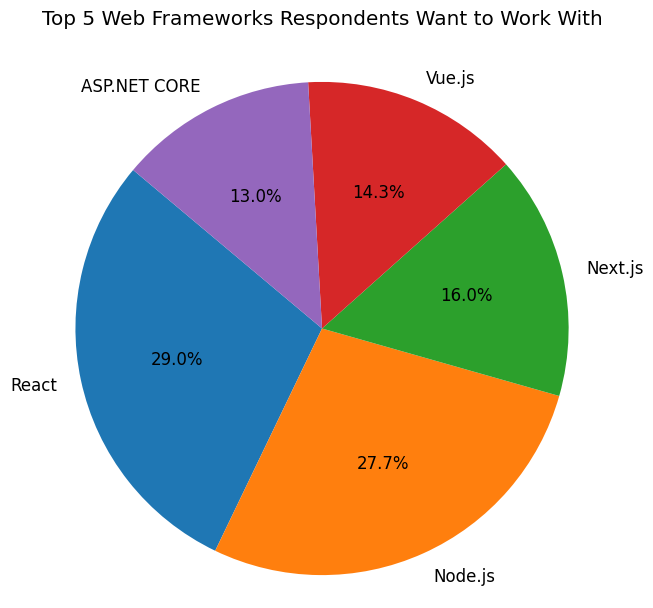

In [26]:
##Write your code here
# Task 3.3 – Preferred Web Frameworks Respondents Want to Work With

webframe_top5 = get_top_n_from_multiselect(df["WebframeWantToWorkWith"], n=5)

plt.figure(figsize=(7,7))
plt.pie(
    webframe_top5.values,
    labels=webframe_top5.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Top 5 Web Frameworks Respondents Want to Work With", pad=25)
plt.axis("equal")
plt.show()


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



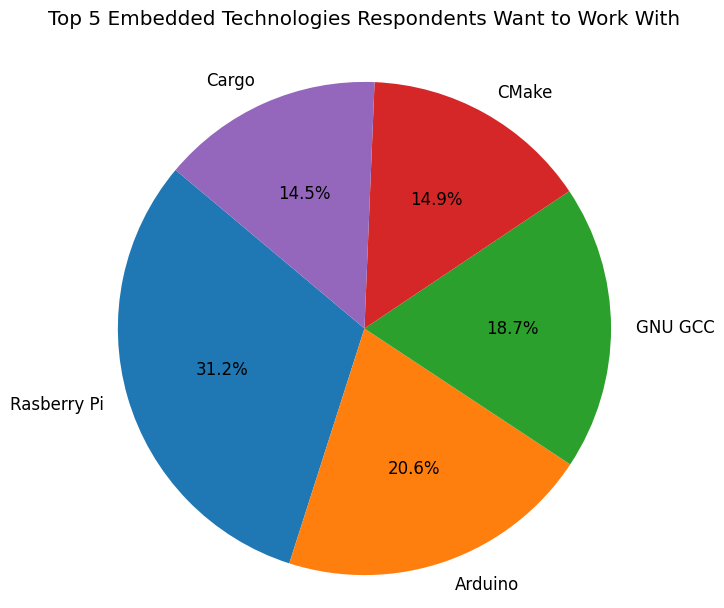

In [27]:
##Write your code here
# Task 3.4 – Most Desired Embedded Technologies

embedded_top5 = get_top_n_from_multiselect(df["EmbeddedWantToWorkWith"], n=5)

plt.figure(figsize=(7,7))
plt.pie(
    embedded_top5.values,
    labels=embedded_top5.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Top 5 Embedded Technologies Respondents Want to Work With", pad=25)
plt.axis("equal")
plt.show()


#**PERSONAL INSIGHTS**
##**Pie Charts Summary & Insights**

This lab focused on understanding developer preferences, tools, and technologies using pie charts. After cleaning multi-select survey columns using splitting and exploding, we visualized the top categories across several key areas. Here are the consolidated findings:

**1. Databases Developers Want to Work With**

PostgreSQL leads decisively, followed by SQLite and MySQL. This suggests a strong preference for open-source relational databases, with NoSQL options like MongoDB and Redis appearing but with a smaller share.

**2. Developer Types**

Full-stack developers make up nearly half of respondents, with backend developers second. This aligns with today’s job market, where full-stack versatility is highly valued.

**3. Operating Systems Used Professionally**

Windows dominates professional use, followed by macOS and Ubuntu. The presence of WSL reflects growing adoption of Linux workflows within Windows environments.

**4. Programming Languages Respondents Have Worked With**

JavaScript remains the most common language, reflecting its ubiquity in web development. Python, SQL, and HTML/CSS are nearly tied, highlighting their essential role across data, backend, and frontend work. TypeScript continues to grow in adoption.

**5. Collaboration Tools Used Professionally**

VS Code overwhelmingly leads as the preferred development environment. Visual Studio, IntelliJ IDEA, Notepad++, and Vim also appear frequently, showing a mix of modern IDEs and lightweight editors.

**6. Most Admired Programming Languages**

JavaScript and Python dominate admiration, with SQL, HTML/CSS, and TypeScript also holding strong positions. Admiration generally aligns with usefulness and community support.

**7. AI Development Tools**

A significant portion of developers use AI tools primarily for writing code and searching for answers. Debugging, documentation, and synthetic content generation also appear, indicating broad integration of AI into everyday workflows.

**8. Web Frameworks Developers Want to Work With**

React and Node.js lead the list, followed closely by Next.js and Vue.js. ASP.NET Core appears as the main .NET-based alternative. This mix reflects modern frontend ecosystems and full-stack JavaScript dominance.

**9. Embedded Technologies Developers Want to Work With**

Raspberry Pi and Arduino top the list, showing strong interest in accessible, educational, and hobbyist-friendly embedded platforms. GNU GCC, CMake, and Cargo indicate interest in lower-level or compiled embedded workflows.

##**🎯 Overall Insights**

  * Developer preferences strongly favor open-source tools and ecosystems, from PostgreSQL to Python to React.

  * AI tools are not limited to data science; they are now used across coding, debugging, and documentation.

  * Multi-select survey data requires careful cleaning, and your approach (split → explode → count) is the correct professional method.

  * Pie charts are useful for composition, but they reinforce a deeper trend: modern developers rely heavily on JavaScript, Python, and user-friendly hardware platforms like Raspberry Pi.

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
